In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.ipython_useSVG = True

The next bit of code is a workaround to circumvent the broken Molrendering caused by changes in [Pandas v0.25.x](https://github.com/rdkit/rdkit/issues/2673).

In [2]:
PandasTools.RenderImagesInAllDataFrames(images=True)

from IPython.core.display import HTML

def show(df):
    return HTML(df.to_html(notebook=True))

In [3]:
mydf = pd.read_pickle('58_molobj.pkl')

,smiles,molport_id,mol
0,CC(=O)c1ccc(c(c1)OC)O,MolPort-000-000-274,
1,c1ccc2c(c1)CCC(C(=O)N2)N,MolPort-000-000-286,
2,c1cc2c(cc1N)NC(=O)CCC2,MolPort-000-000-287,
3,C1CCCC(CC1)(C(=O)O)N,MolPort-000-000-293,
4,Cc1cc(c2c(n1)CCCC2)N,MolPort-000-000-304,

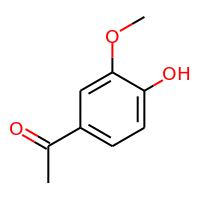
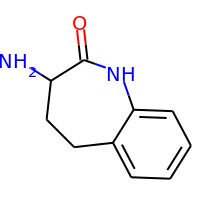
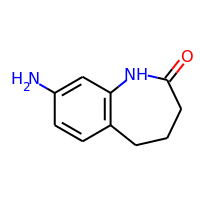
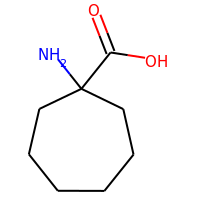
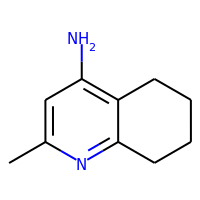

In [4]:
show(mydf.head())

In [5]:
query = Chem.MolFromSmiles('c1ccncc1')

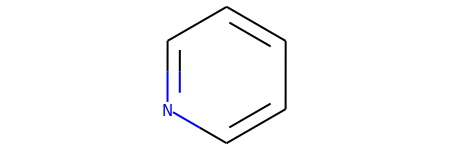

In [6]:
query

In [7]:
hits = mydf[mydf['mol'] >= query]

In [8]:
hits.shape

(4, 3)

,smiles,molport_id,mol
4,Cc1cc(c2c(n1)CCCC2)N,MolPort-000-000-304,
8,c1cc2c(ccnc2cc1Cl)N,MolPort-000-000-321,
13,c1cc2cc(ccc2nc1)CN,MolPort-000-000-390,
16,c1cc(cnc1)C(C(=O)O)N,MolPort-000-000-411,

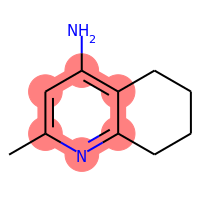
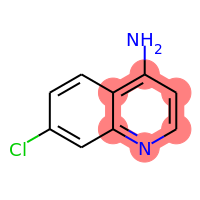
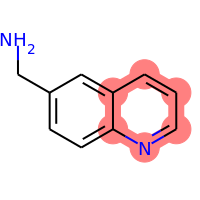
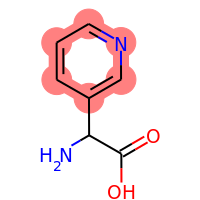

In [9]:
show(hits.head())

In [10]:
PandasTools.WriteSDF(hits, 'substruct_hits.sdf', molColName='mol', idName='molport_id')